In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import math

% matplotlib inline

In [2]:
df = pd.read_csv("grants.csv")

C:\Users\jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#head of big dataframe
df.head()

,Unnamed: 0,index,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
0,0,13988,TRUSTEES OF BOSTON UNIVERSITY,Trustees of Boston University,Patricia A McAnany,(919) 962-0524,mcanany@email.unc.edu,NaN,2006-10-02,12000.0,...,MA,02215-1300,Boston,US,"=""07""","Under the supervision of Dr. Patricia McAnany,...",NaN,NaN,NaN,NaN
1,1,13987,FORDHAM UNIVERSITY,Fordham University,Edward B Dubrovsky,(718) 817-3660,dubrovsky@fordham.edu,NaN,2006-10-03,377929.0,...,NH,03755-1404,Hanover,US,"=""02""",Juvenile hormone (JH) is a major component of ...,"Xie, X; Dubrovskaya, VA; Dubrovsky, EB~RNAi kn...",NaN,NaN,NaN
2,2,13986,TRUSTEES OF THE UNVERSITY OF PENNSYLVANIA,University of Pennsylvania,Richard Berk,(310) 206-9544,berk@stat.ucla.edu,NaN,2006-10-04,0.0,...,PA,19104-6205,Philadelphia,US,"=""02""",PROPOSAL ID: 0437169<br/>PRINCIPAL INVESTIGATO...,"Berk, R.~Forecasting Murder within a Populatio...",NaN,NaN,NaN
3,3,13984,WEST VIRGINIA UNIVERSITY RESEARCH CORPORATION,West Virginia University Research Corporation,Bojan Cukic,(304) 293-9686,bojan.cukic@mail.wvu.edu,Bojan Cukic,2006-10-05,0.0,...,WV,"=""26506""",NaN,US,"=""01""",The existing Industry/University Cooperative R...,"Ross, A~IRIS RECOGNITION: THE PATH FORWARD~COM...","Kalka, N;Bartlow, N;Cukic, B~An Automated Meth...",CITeR is the National Science Foundation (NSF)...,NaN
4,4,13985,"UNIVERSITY OF GEORGIA RESEARCH FOUNDATION, INC.",University of Georgia Research Foundation Inc,John M Burke,(706) 542-3732,jmburke@uga.edu,NaN,2006-10-05,590887.0,...,GA,30602-7411,NaN,US,"=""10""",Award Abstract<br/><br/>The domestication of c...,"Burger, J.C., M.A. Chapman, and J.M. Burke~Mol...",NaN,NaN,NaN


In [4]:
len(df)

155099

Create a dataframe with only USA data points and create a datetime object to use later

In [5]:
US = df[df["Primary Country"] == "US"]
USA = df[df["Primary Country"] == "USA"]
us_df = pd.concat([US, USA]) 

In [6]:
len(us_df)

153219

In [7]:
us_df["Award Date"] = us_df["Award Date"].apply(lambda x: x[:-2] + "01")

In [8]:
from datetime import date, time, datetime
us_df["Award Date"] = list(map(lambda x: datetime.strptime(x,'%Y-%m-%d'), us_df["Award Date"]))

In [9]:
us_df["Award Date"][0]

Timestamp('2006-10-01 00:00:00')

In [10]:
us_df_sort = us_df.drop_duplicates()

In [11]:
len(us_df_sort)

153219

Create a grouped table to use for aggregate counts/means for different months/years.

In [12]:
grouped = us_df.groupby(["Award Date"], as_index = False).agg(['count', 'mean'])
grouped.reset_index(level=0, inplace=True)
grouped.head()

Award Date Unnamed: 0              index                \
                  count         mean count          mean   
0 2006-10-01        124    61.500000   124  13926.500000   
1 2006-11-01        304   275.500000   304  13712.500000   
2 2006-12-01        456   655.769737   456  13332.225877   
3 2007-01-01        683  1226.000000   683  12762.000000   
4 2007-02-01        686  1912.179300   686  12075.832362   

  Estimated Total Award Amount                Funds Obligated to Date  \
                         count           mean                   count   
0                          124  273456.701613                     124   
1                          304  401312.164474                     304   
2                          456  269361.094298                     456   
3                          683  276697.023426                     683   
4                          686  260660.638484                     686   

                 Unnamed: 44       
            mean       count mean  
0  470900.229274           0  NaN  
1  651405.188487           0  NaN  
2  444250.563860           0  NaN  
3  548793.428726           0  NaN  
4  372531.521953           0  NaN

Create the award means/counts columns in the grouped df (for easy access).

In [13]:
awards_count = list(grouped.iloc[:,7])
awards_mean = list(grouped.iloc[:,8])
mean = [round(award) for award in awards_mean]
awards_count[:5], awards_mean[:5], mean[:5]


([124, 304, 456, 683, 686],
 [470900.2292741935,
  651405.1884868421,
  444250.5638596491,
  548793.4287262079,
  372531.5219533527],
 [470900, 651405, 444251, 548793, 372532])

In [14]:
grouped["mean"] = mean
grouped["count"]= awards_count

Create a month/year (datetime object and int values) to add to the grouped dataframe

In [17]:
grouped["Award Date month"] = list(map(lambda x: x.month, grouped["Award Date"]))
grouped["Award Date year"] = list(map(lambda x: x.year, grouped["Award Date"]))
grouped["Award Date month non timestamp"] = list(map(lambda x: int(x.month), grouped["Award Date"]))
grouped["Award Date year non timestamp"] = list(map(lambda x: int(x.year), grouped["Award Date"]))

In [18]:
grouped.head()

Award Date Unnamed: 0              index                \
                  count         mean count          mean   
0 2006-10-01        124    61.500000   124  13926.500000   
1 2006-11-01        304   275.500000   304  13712.500000   
2 2006-12-01        456   655.769737   456  13332.225877   
3 2007-01-01        683  1226.000000   683  12762.000000   
4 2007-02-01        686  1912.179300   686  12075.832362   

  Estimated Total Award Amount                Funds Obligated to Date  \
                         count           mean                   count   
0                          124  273456.701613                     124   
1                          304  401312.164474                     304   
2                          456  269361.094298                     456   
3                          683  276697.023426                     683   
4                          686  260660.638484                     686   

                 Unnamed: 44         mean count Award Date month  \
            mean       count mean                                  
0  470900.229274           0  NaN  470900   124               10   
1  651405.188487           0  NaN  651405   304               11   
2  444250.563860           0  NaN  444251   456               12   
3  548793.428726           0  NaN  548793   683                1   
4  372531.521953           0  NaN  372532   686                2   

  Award Date year Award Date month non timestamp Award Date year non timestamp  
                                                                                
0            2006                             10                          2006  
1            2006                             11                          2006  
2            2006                             12                          2006  
3            2007                              1                          2007  
4            2007                              2                          2007

Create a month/year (datetime object and int values) to add to the usa dataframe

In [20]:
us_df["Award Date month"] = list(map(lambda x: x.month, us_df["Award Date"]))
us_df["Award Date year"] = list(map(lambda x: x.year, us_df["Award Date"]))
us_df["Award Date month non timestamp"] = list(map(lambda x: int(x.month), us_df["Award Date"]))
us_df["Award Date year non timestamp"] = list(map(lambda x: int(x.year), us_df["Award Date"]))
months = list(grouped["Award Date month"])


In [21]:
us_df.head()

,Unnamed: 0,index,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,...,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44,Award Date month,Award Date year,Award Date month non timestamp,Award Date year non timestamp
0,0,13988,TRUSTEES OF BOSTON UNIVERSITY,Trustees of Boston University,Patricia A McAnany,(919) 962-0524,mcanany@email.unc.edu,NaN,2006-10-01,12000.0,...,"=""07""","Under the supervision of Dr. Patricia McAnany,...",NaN,NaN,NaN,NaN,10,2006,10,2006
1,1,13987,FORDHAM UNIVERSITY,Fordham University,Edward B Dubrovsky,(718) 817-3660,dubrovsky@fordham.edu,NaN,2006-10-01,377929.0,...,"=""02""",Juvenile hormone (JH) is a major component of ...,"Xie, X; Dubrovskaya, VA; Dubrovsky, EB~RNAi kn...",NaN,NaN,NaN,10,2006,10,2006
2,2,13986,TRUSTEES OF THE UNVERSITY OF PENNSYLVANIA,University of Pennsylvania,Richard Berk,(310) 206-9544,berk@stat.ucla.edu,NaN,2006-10-01,0.0,...,"=""02""",PROPOSAL ID: 0437169<br/>PRINCIPAL INVESTIGATO...,"Berk, R.~Forecasting Murder within a Populatio...",NaN,NaN,NaN,10,2006,10,2006
3,3,13984,WEST VIRGINIA UNIVERSITY RESEARCH CORPORATION,West Virginia University Research Corporation,Bojan Cukic,(304) 293-9686,bojan.cukic@mail.wvu.edu,Bojan Cukic,2006-10-01,0.0,...,"=""01""",The existing Industry/University Cooperative R...,"Ross, A~IRIS RECOGNITION: THE PATH FORWARD~COM...","Kalka, N;Bartlow, N;Cukic, B~An Automated Meth...",CITeR is the National Science Foundation (NSF)...,NaN,10,2006,10,2006
4,4,13985,"UNIVERSITY OF GEORGIA RESEARCH FOUNDATION, INC.",University of Georgia Research Foundation Inc,John M Burke,(706) 542-3732,jmburke@uga.edu,NaN,2006-10-01,590887.0,...,"=""10""",Award Abstract<br/><br/>The domestication of c...,"Burger, J.C., M.A. Chapman, and J.M. Burke~Mol...",NaN,NaN,NaN,10,2006,10,2006


### trying to plot the award amount per date, it's too much for 1 graph (unclear trends)

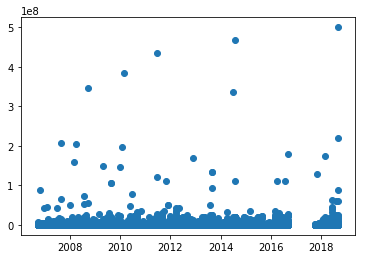

In [22]:
plt.scatter(list(us_df["Award Date"]), list(us_df["Estimated Total Award Amount"]))

### plotting the award date vs the mean amount in awards

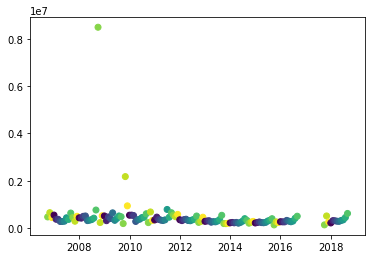

In [23]:
plt.scatter(list(grouped["Award Date"]), mean, c= months)

### plotting the award count over time for the dataset

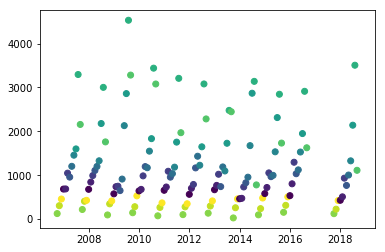

In [24]:
plt.scatter(list(grouped["Award Date"]), awards_count, c = months)


In [25]:
corr_month_mean = grouped["Award Date month non timestamp"].corr(grouped["mean"])
corr_year_mean = grouped["Award Date year non timestamp"].corr(grouped["mean"])
corr_month_count = grouped["Award Date month non timestamp"].corr(grouped["count"])
corr_year_count = grouped["Award Date year non timestamp"].corr(grouped["count"])

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
corr_month_mean, corr_year_mean, corr_month_count,corr_year_count

(0.14482204266888551,
 -0.19151125358263218,
 0.014435453960704041,
 0.0036742969775268855)

### The correlation between the month/year and the mean Award amount per month

no statistically significant correlation

In [28]:
x = pd.concat([grouped["Award Date month non timestamp"], grouped["Award Date year non timestamp"]], axis = 1)
X = sm.add_constant(x)
y = list((grouped["mean"]))
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
results.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.591
Date:                Sun, 02 Dec 2018   Prob (F-statistic):             0.0303
Time:                        13:20:18   Log-Likelihood:                -1966.5
No. Observations:                 132   AIC:                             3939.
Df Residuals:                     129   BIC:                             3948.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

const                             0.038901
Award Date month non timestamp    0.141512
Award Date year non timestamp     0.039499
dtype: float64

### The correlation between the Award month/year and the count of awards given

no statistically sig corr between date/ count

In [29]:
x = pd.concat([grouped["Award Date month non timestamp"], grouped["Award Date year non timestamp"]], axis = 1)
X = sm.add_constant(x)
y = list((grouped["count"]))
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
results.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                   0.01513
Date:                Sun, 02 Dec 2018   Prob (F-statistic):              0.985
Time:                        13:20:19   Log-Likelihood:                -1087.4
No. Observations:                 132   AIC:                             2181.
Df Residuals:                     129   BIC:                             2189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

const                             0.972390
Award Date month non timestamp    0.866182
Award Date year non timestamp     0.953842
dtype: float64

### The correlation between month and year and the Estimated total award amount for the UNGROUPED us data

for the ungrouped data there is statistically significant data for the total award amount and the month/year. Will look into this further.

In [30]:
x = pd.concat([us_df["Award Date month non timestamp"], us_df["Award Date year non timestamp"]], axis = 1)
X = sm.add_constant(x)
y = list((us_df['Estimated Total Award Amount']))
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
results.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     47.52
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.33e-21
Time:                        13:20:19   Log-Likelihood:            -2.5197e+06
No. Observations:              153219   AIC:                         5.039e+06
Df Residuals:                  153216   BIC:                         5.039e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

const                             1.778272e-12
Award Date month non timestamp    1.690492e-12
Award Date year non timestamp     1.247492e-12
dtype: float64